In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import librosa
import seaborn as sns
import scipy

np.set_printoptions(linewidth=np.inf,threshold=np.inf)
pd.set_option('display.max_rows', 50)
pd.set_option('display.min_rows', 50)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import classification_report

from sklearn.decomposition import PCA

In [3]:
data_dir = '/Users/joshwinnes/Library/Mobile Documents/com~apple~CloudDocs/Wheaton College/fall 2024/topics in data science/data/voice_clip_selected/'
voice_clip_meta_data = pd.read_csv(data_dir+'voice_clip_meta_data.csv')
voice_feature = pd.read_csv(data_dir+'voice_feature_20241022.csv')

**Objective**

- To build a classifier of voice data. Common attributes associated with voice data are speaker attributes, such as speaker identity, age, gender, accents, articulation rate, or the voice clip’s attributes, such as presence of emotion, anticipated listener emotion reaction, etc. 

- The voice features to use can be anything, those we tried in class, and those that you further explore and compute.

- If you use the common voice clip set we have been using, you can use the same feature sets. But you can not predict the “gender” since we already built a classifier in class. 

- Conduct experiment with at least three classification algorithms available in scikit-learn, or elsewhere, with correspondingly different sets of required parameters. Compare and report the accuracies of your classifiers.  

**Specifications**

- Collect data: you can use the common voice data we have been working with, or any voice data

- Utilize at least five types of voice features that we worked on (e.g., the whole MFCC set is one feature type)

- Utilize at least three classification algorithms

**Deliverables**

- A self contained python jupyter notebook that implements the specifications and produces the artifact.

- Your notebook should not contain extraneous code cells, should not contain definitions of variables or functions that were not used.

- Your notebook should contain markdown texts throughout to explain the purpose of the code cells and to interpret the results of the code cells, in context.

- Please make sure you put the github links to your notebook and data file (if you used a different dataset)  in the submission field on Canvas.

## 1. Random Forest Classifier

In [4]:
# Arrangements
age_name = ['teens', 'twenties','thirties', 'fourties', 'fifties', 'sixties', 'seventies', 'eighties','nineties']
age_value = range(1,10)
age_dict = dict(zip(age_name, age_value))
gender_name = ["male_masculine","female_feminine"]
gender_value = [0,1]
gender_dict = dict(zip(gender_name, gender_value))
voice_feature['age'] = voice_feature['age'].map(age_dict)
voice_feature['gender'] = voice_feature['gender'].map(gender_dict)

In [5]:
# Define mapping since age buckets are qualitative
age_mapping = {
    1: 'teens', 
    2: 'twenties', 
    3: 'thirties', 
    4: 'fourties', 
    5: 'fifties', 
    6: 'sixties', 
    7: 'seventies', 
    8: 'eighties', 
    9: 'nineties'
}


# Select features and target
X = voice_feature[['f0_mean', 'f0_std', 'f0_var', 'f0_min', 'f0_max', 'f0_skew',
                    'f0_kurtosis', 'zcr_mean', 'zcr_std', 'zcr_var', 'zcr_min', 
                    'zcr_max', 'zcr_skew', 'zcr_kurtosis'] + 
                   ['mfcc_{:02d}'.format(i) for i in range(25)]]
y = voice_feature['age']  # Keep the numerical labels for modeling

In [6]:
# Handle missing values
X.fillna(X.mean(), inplace=True)
y.fillna(y.mode()[0], inplace=True)  # For categorical data, fill with the mode

# Normalize/Scale features
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=7)
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=list(age_mapping.values())))

/var/folders/99/6591xgpn4sq1ypfgnrzy_7n80000gn/T/ipykernel_15927/3860052904.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


Accuracy: 0.714777878513146
              precision    recall  f1-score   support

       teens       0.82      0.64      0.72       829
    twenties       0.60      0.91      0.73      1651
    thirties       0.73      0.78      0.75      1333
    fourties       0.87      0.57      0.69       739
     fifties       0.98      0.36      0.53       352
     sixties       0.94      0.52      0.67       334
   seventies       1.00      0.46      0.63       237
    eighties       1.00      0.25      0.40         8
    nineties       1.00      0.69      0.81        32

    accuracy                           0.71      5515
   macro avg       0.88      0.58      0.66      5515
weighted avg       0.77      0.71      0.71      5515



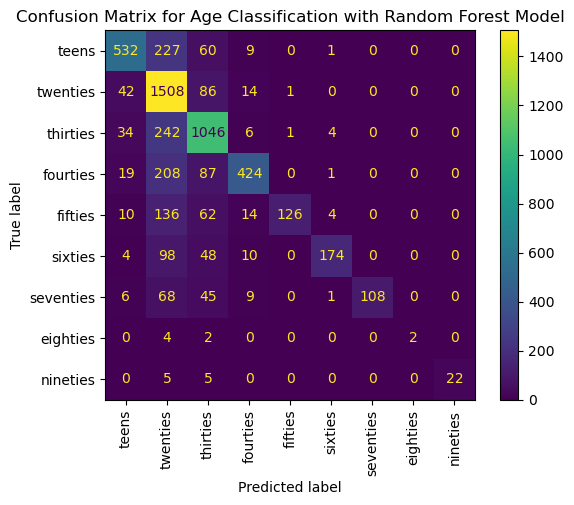

In [7]:
class_names = list(age_mapping.values())
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=class_names)
plt.xticks(rotation=90)
plt.title('Confusion Matrix for Age Classification with Random Forest Model')
plt.show()


## 2. K-Neighbors Classifier

Accuracy: 0.8817769718948323
              precision    recall  f1-score   support

       teens       0.88      0.87      0.88       829
    twenties       0.89      0.91      0.90      1651
    thirties       0.86      0.90      0.88      1333
    fourties       0.87      0.86      0.86       739
     fifties       0.93      0.80      0.86       352
     sixties       0.92      0.89      0.90       334
   seventies       0.97      0.76      0.85       237
    eighties       0.83      0.62      0.71         8
    nineties       0.81      0.94      0.87        32

    accuracy                           0.88      5515
   macro avg       0.88      0.84      0.86      5515
weighted avg       0.88      0.88      0.88      5515



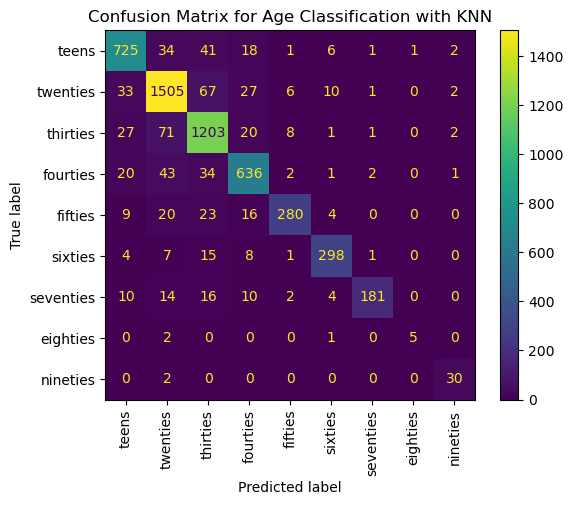

In [8]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the KNN model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=list(age_mapping.values())))

# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=class_names)
plt.xticks(rotation=90)
plt.title("Confusion Matrix for Age Classification with KNN")
plt.show()


## 3. XGBClassifier
In order to run this, you'll need to run

`conda install xgboost`

In [13]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [50, 100, 200, 300],           # Small range to keep training time low
    'learning_rate': [0.01, 0.05, 0.1, 0.2],   # Limited to effective rates that balance speed and accuracy
    'max_depth': [3, 5, 10],                 # Shallow depths are often effective for boosting
    'subsample': [0.8],                  # Keeps the model robust by using 80% of data per tree
    'colsample_bytree': [0.8],           # Limits columns to reduce overfitting and speed up training
}

classifier = XGBClassifier()

grid_search = GridSearchCV(estimator = classifier, param_grid=param_grid, cv=3, scoring='accuracy')

grid_search.fit(X_train, y_train-1)
MLPC_pred = grid_search.best_estimator_.predict(X_test)
print('Accuracy Score: ', accuracy_score(y_test-1, MLPC_pred))
print(classification_report(y_test-1, MLPC_pred, target_names=list(age_mapping.values())))

Accuracy Score:  0.8056210335448776
              precision    recall  f1-score   support

       teens       0.86      0.76      0.81       829
    twenties       0.73      0.92      0.81      1651
    thirties       0.79      0.85      0.82      1333
    fourties       0.89      0.75      0.81       739
     fifties       0.96      0.60      0.74       352
     sixties       0.92      0.69      0.79       334
   seventies       0.98      0.62      0.76       237
    eighties       1.00      0.50      0.67         8
    nineties       1.00      0.75      0.86        32

    accuracy                           0.81      5515
   macro avg       0.90      0.72      0.78      5515
weighted avg       0.82      0.81      0.80      5515



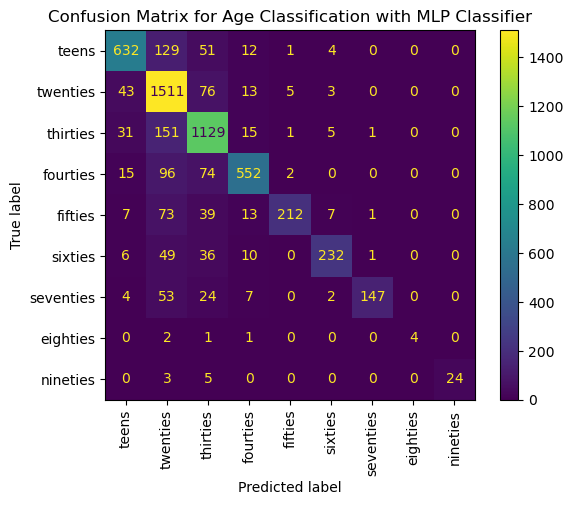

In [14]:
ConfusionMatrixDisplay.from_predictions(y_test-1, MLPC_pred, display_labels=class_names)
plt.xticks(rotation=90)
plt.title("Confusion Matrix for Age Classification with MLP Classifier")
plt.show()

# Conclusion and Analysis of Different Classification Models